Images come from teh Project F Folder shared drive

Tutorials:

https://medium.com/@sidathasiri/building-a-convolutional-neural-network-for-image-classification-with-tensorflow-f1f2f56bd83b


FCN (Fully Convolutional Network) 
https://towardsdatascience.com/implementing-a-fully-convolutional-network-fcn-in-tensorflow-2-3c46fb61de3b

https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05



Papers:

Sources from suggestions on stack exchange: https://ai.stackexchange.com/questions/6274/how-can-i-deal-with-images-of-variable-dimensions-when-doing-image-segmentation

https://arxiv.org/pdf/1505.04597.pdf

https://arxiv.org/pdf/1411.4038.pdf

https://arxiv.org/pdf/1406.4729.pdf

https://arxiv.org/pdf/1904.04514.pdf

https://arxiv.org/pdf/1612.03144.pdf

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataFolder = "drive/Shareddrives/Project F Folder/data/"
imgFolder = dataFolder + "resized/"

_, _, images = next(os.walk(imgFolder))
print("Found %d images" % len(images))

Found 8355 images


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Functions

# Splits image name into artist name and image number
def parseImageName(imageName):
  splitImg = imageName.split("_")
  artist = splitImg[0]
  for i in range(1, len(splitImg) - 1): # Get the artist name
    artist += "_" + splitImg[i]
  imgNum = splitImg[-1][:-4] # Art number
  return artist, imgNum

def getImageName(artistName, imgNum):
  return artistName + "_" + str(imgNum) + ".jpg"
  
# Image Dimmensions, length by height
def getImgDim(img):
  return len(img[0]), len(img)

def aspectRatio(width, height):
  return float(width)/height

# Plots the ith image in the image list in the imgFolder
# Prints the name of the image, artist and dimmensions
def plotImage(i):
    imgPath = imgFolder + images[imgI]
    img = mpimg.imread(imgPath) # Images is 2D array
    imgLen, imgWid = getImgDim(img) # Dimmensions
    artist, imgNum = parseImageName(images[imgI])
    print(images[imgI])
    print(artist, imgNum)
    print(imgLen, 'x', imgWid)
    imgplot = plt.imshow(img)
    plt.axis('off')

Vincent_van_Gogh_251.jpg
Vincent_van_Gogh 251
338 x 614


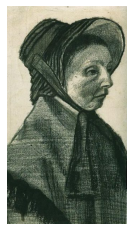

In [4]:
# Display a random image
imgI = random.randint(0, len(images)) # random number
plotImage(imgI)

In [5]:
# Goes thru image files and converts any name containing non-ascii chars and converts them
def convertFilenamesToAscii():
    for img in images:
        if not img.isascii():
            print(img)
            imgAsAscii = str(img.encode('ascii', 'ignore'))[2:-1]
            os.rename(imgFolder + img, imgFolder + imgAsAscii)
#convertFilenamesToAscii()

In [6]:
# Get the list of artists, their artwork numbers, their total number of artworks and list of filenames for their art
artists = [] # Artist names 
artNums = [] # List of numbers of artworks (each artist gets a list)
artCount = [] # Counts of artwork per artist
artistFiles = []  # Filenames organized by artist (each artist gets a list)
for image in images: 
  artist, imgNum = parseImageName(image) # Get artist name and artwork number
  if artist not in artists: # New Artist
    artists.append(artist)
    artNums.append([imgNum])
    artistFiles.append([image])
    artCount.append(0)
  else: # Old Artist
    index = artists.index(artist)
    artNums[index].append(imgNum)
    artistFiles[index].append(image)
    artCount[index] += 1

numArtists = len(artists)

# Sort by descending number of works
myZipped = zip(artCount, artists, artNums, artistFiles)
mySorted = sorted(myZipped, reverse=True)
tuples = zip(*mySorted)
artCount, artists, artNums, artistFiles= [ list(tuple) for tuple in  tuples]

Number of Artists 50
877 Vincent_van_Gogh
702 Edgar_Degas
439 Pablo_Picasso
336 Pierre-Auguste_Renoir
328 Albrecht_Duerer
311 Paul_Gauguin
291 Francisco_Goya
262 Rembrandt
259 Alfred_Sisley
255 Titian
239 Marc_Chagall
194 Rene_Magritte
193 Amedeo_Modigliani
188 Paul_Klee
186 Henri_Matisse
181 Andy_Warhol
171 Mikhail_Vrubel
164 Sandro_Botticelli
143 Leonardo_da_Vinci
141 Peter_Paul_Rubens
139 Salvador_Dali
137 Hieronymus_Bosch
134 Pieter_Bruegel
126 Kazimir_Malevich
120 Frida_Kahlo
119 Giotto_di_Bondone
117 Gustav_Klimt
109 Raphael
102 Joan_Miro
99 Andrei_Rublev
91 Camille_Pissarro
90 Edouard_Manet
88 Vasiliy_Kandinskiy
87 El_Greco
84 Piet_Mondrian
81 Jan_van_Eyck
81 Henri_de_Toulouse-Lautrec
73 Claude_Monet
70 Henri_Rousseau
70 Diego_Rivera
67 Edvard_Munch
66 William_Turner
59 Gustave_Courbet
55 Caravaggio
49 Michelangelo
47 Paul_Cezanne
43 Georges_Seurat
37 Diego_Velazquez
31 Eugene_Delacroix
24 Jackson_Pollock


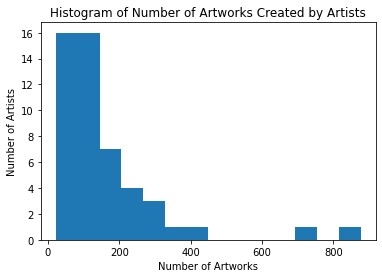

In [7]:
# List out artist names and number of works
print("Number of Artists %d" % numArtists)
for i in range(len(artists)):
  print(len(artNums[i]), artists[i])

# Histogram
plt.figure()
plt.title("Histogram of Number of Artworks Created by Artists")
plt.xlabel("Number of Artworks")
plt.ylabel("Number of Artists")
plt.hist(artCount, bins='auto')
plt.show()

In [8]:
# Gets the data for the top n artists (most works)
def getTopNArtists(n):
    newArtists = artists[:n]
    newArtNums = artNums[:n]
    newArtCount = artCount[:n]
    newArtistFiles = artistFiles[:n]
    newNumArtists = len(newArtistFiles)
    return newArtists, newArtNums, newArtCount, newArtistFiles, newNumArtists
  
# Shuffle the artwork files
def shuffleFiles(files):
    for i in range(len(files)):
        random.shuffle(files[i])
    return files

# Shuffle all of the art data around
def shuffleData(myArtists, myArtNums, myArtCount, myArtFiles):
    myIs = list(range(0,len(myArtists))) # RandomOrdering
    random.shuffle(myIs)
    newArtists = []
    newArtNums = []
    newArtCount = []
    newArtistFiles = []
    for i in myIs:
        newArtists.append(myArtists[i])
        newArtNums.append(myArtNums[i])
        newArtCount.append(myArtCount[i])
        newArtistFiles.append(myArtFiles[i])
    shuffleFiles(newArtistFiles)
    return newArtists, newArtNums, newArtCount, newArtistFiles, newNumArtists

# Returns the first n artist files
def getNFiles(files, n):
    nFiles = []
    for i in range(len(files)):
        nFiles.append(files[i][:n])
    return nFiles
    
# Get data for the top n artists
newArtists, newArtNums, newArtCount, newArtistFiles, newNumArtists = getTopNArtists(5)
# Shuffle Them
newArtists, newArtNums, newArtCount, newArtistFiles, newNumArtists = shuffleData(newArtists, newArtCount, 
                                                                                 newArtCount, newArtistFiles)
# Takes the first n files
newArtistFiles = getNFiles(newArtistFiles, 200)

# Sanity check
print(len(newArtistFiles[0])) # Print number of files
for i in range(len(newArtists)): # print artist name and first file
    print(newArtists[i], newArtistFiles[i][0])


200
Vincent_van_Gogh Vincent_van_Gogh_453.jpg
Pablo_Picasso Pablo_Picasso_190.jpg
Albrecht_Duerer Albrecht_Duerer_43.jpg
Pierre-Auguste_Renoir Pierre-Auguste_Renoir_193.jpg
Edgar_Degas Edgar_Degas_356.jpg


In [9]:
# Overwrite the whole art set with the selected portion from the previous block
artists = newArtists
artNums = newArtNums
artCount = newArtCount 
artistFiles = newArtistFiles

In [12]:
# Delete contents of train and test folders
trainFolder = dataFolder + "train/"
valFolder = dataFolder + "val/"

# Colab
!rm -rf "drive/Shareddrives/Project F Folder/data/train/"
!rm -rf "drive/Shareddrives/Project F Folder/data/val/"
# local
#os.system('rm -rf ' + trainFolder)
#os.system('rm -rf ' + valFolder)
if not os.path.exists(trainFolder):
  os.mkdir(trainFolder)
if not os.path.exists(valFolder):
  os.mkdir(valFolder)

In [13]:
# Copy the files to the train and validation folder
# Slow on Colab
import shutil
split = .25  
count = 0
for i in range(len(artists)): # For each artist
    totalWorks = len(newArtistFiles[i])
    numInVal = int(split * totalWorks)
    for j in range(totalWorks): # For each artwork
        file = artistFiles[i][j] 
        if numInVal > 0: # Add to val set
            shutil.copy(imgFolder + file, valFolder + file)
            numInVal -= 1
        else: # add to trainset
            shutil.copy(imgFolder + file, trainFolder + file)
        count += 1
        if count % 10 == 0:
          print("Copied ", j + 1, " of ", totalWorks, " for ", artists[i])
print("Finished copying")


Copied  10  of  200  for  Vincent_van_Gogh
Copied  20  of  200  for  Vincent_van_Gogh
Copied  30  of  200  for  Vincent_van_Gogh
Copied  40  of  200  for  Vincent_van_Gogh
Copied  50  of  200  for  Vincent_van_Gogh
Copied  60  of  200  for  Vincent_van_Gogh
Copied  70  of  200  for  Vincent_van_Gogh
Copied  80  of  200  for  Vincent_van_Gogh
Copied  90  of  200  for  Vincent_van_Gogh
Copied  100  of  200  for  Vincent_van_Gogh
Copied  110  of  200  for  Vincent_van_Gogh
Copied  120  of  200  for  Vincent_van_Gogh
Copied  130  of  200  for  Vincent_van_Gogh
Copied  140  of  200  for  Vincent_van_Gogh
Copied  150  of  200  for  Vincent_van_Gogh
Copied  160  of  200  for  Vincent_van_Gogh
Copied  170  of  200  for  Vincent_van_Gogh
Copied  180  of  200  for  Vincent_van_Gogh
Copied  190  of  200  for  Vincent_van_Gogh
Copied  200  of  200  for  Vincent_van_Gogh
Copied  10  of  200  for  Pablo_Picasso
Copied  20  of  200  for  Pablo_Picasso
Copied  30  of  200  for  Pablo_Picasso
Copied  4